In [533]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from matplotlib.colors import ListedColormap


In [534]:
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

In [535]:
iris = load_iris()
x = iris['data']
x = x[:, :2]
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']


In [536]:
y= np.squeeze(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [537]:
for target, target_name in enumerate(names):
    print(target)

0
1
2


In [538]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, shuffle=True)


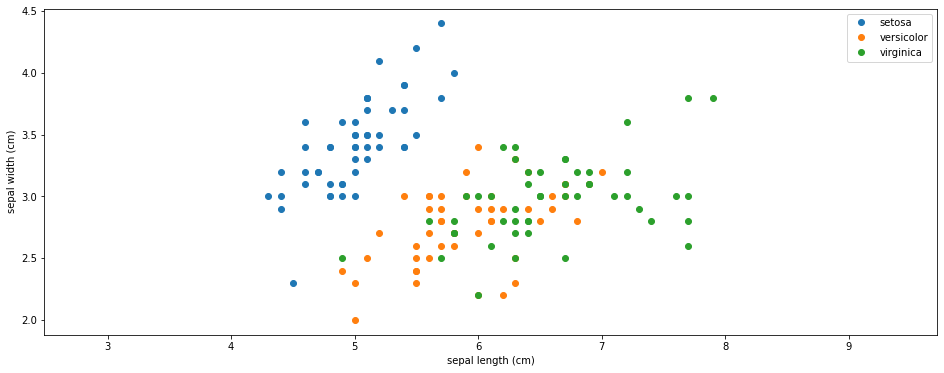

In [539]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
for target, target_name in enumerate(names):
    x_plot = x[y == target]
    axs.plot(x_plot[:, 0], x_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
axs.set_xlabel(feature_names[0])
axs.set_ylabel(feature_names[1])
axs.axis('equal')
axs.legend()


In [540]:
y = y.reshape((len(y), 1))

In [541]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer=nn.Sequential(
        nn.Linear(2, 200),
        nn.ReLU(),
        nn.Linear(200, 100),
        nn.Tanh(),
        nn.Linear(100, 3),
        #nn.Softmax(dim=1),
        )

    def forward(self, X):
        X = self.layer(X)
        return X

In [542]:
model1 = Model()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()
model1


Model(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): Tanh()
    (4): Linear(in_features=100, out_features=3, bias=True)
  )
)

In [543]:
Epochs = 200
x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [544]:
loss_list = np.zeros((Epochs,))
accuracy_list = np.zeros((Epochs,))

for epoch in range(Epochs):
    y_pred = model1(x_train)
    loss= loss_func(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model1(x_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

    if(epoch+1)%10==0:
        print(loss.item())

0.5460798740386963
0.43457257747650146
0.39690014719963074
0.3808222711086273
0.3705022633075714
0.3629535734653473
0.35656630992889404
0.35049375891685486
0.34450283646583557
0.33847999572753906
0.332425981760025
0.32633399963378906
0.32030990719795227
0.3144264221191406
0.3087417781352997
0.3032018840312958
0.29783788323402405
0.2925522029399872
0.28742024302482605
0.2825470268726349


Text(0.5, 0, 'epochs')

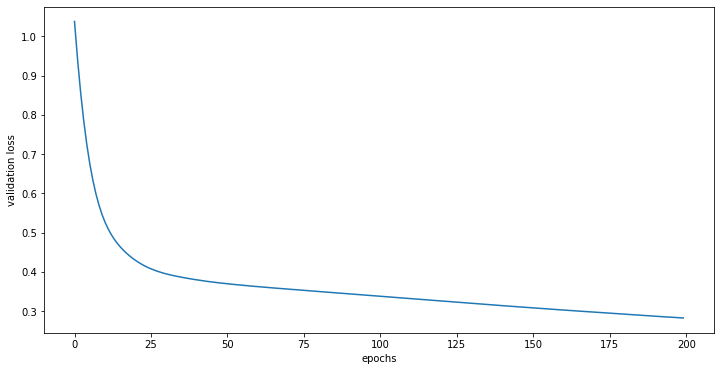

In [545]:
fig, ax1 = plt.subplots(1, figsize=(12, 6))


ax1.plot(loss_list)
ax1.set_ylabel("validation loss")
ax1.set_xlabel("epochs")

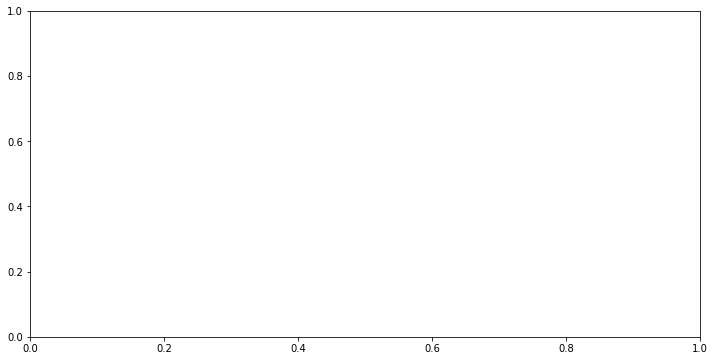

In [546]:
fig, ax1 = plt.subplots(1, figsize=(12, 6))
h=0.02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.c_[xx.ravel(), yy.ravel()]


In [547]:
torch.argmax(model1(torch.from_numpy(Z).float()),dim=1)

tensor([2, 2, 2,  ..., 2, 2, 2])